# Week 8 : Lecture A 
 ## Data structures: Numerical arrays
 ##### CS1P - University of Glasgow - John H. Williamson - 2017/2018 - Python 3.x

In [1]:
from image_audio  import *
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
%matplotlib inline

## Languages -> central data type
(very roughly -- this is *not* definitive!)

* Lisp, Scheme, Clojure -> **lists**
* Java, C++, Smalltalk, Objective-C -> **classes**
* Assembly -> **integers**
* C -> **pointers, structs**
* Lua -> **tables**
* Javascript -> **objects, mixed**
* Perl -> **strings**
* Haskell -> **mixed immutable (lists, ADTs, etc.)**
* Python, Ruby -> **mixed**
* APL, J, K, GLSL, HLSL -> **arrays**



# Arrays
## Why use arrays?
### Images, sounds, videos
Numerical arrays sound boring. But they are the most "fun" data structure we will see. Images, sounds, videos are all most easily worked with as arrays of numbers. An *image* is a 2D array of brightness values; a *sound* is a 1D array of sound pressure levels; a *video* is a 3D array of brightness values (x, y, and 
time); a 3D model has vertices (a 2D array of $n$ $(x,y,z)$ coordinates).

And the manipulations that we might want to apply to these kinds of data (e.g. brightening a video, mixing together two sounds, cropping a video, rotating a 3D model) are very straightforward to express in terms of array operations.

### Scientific data
Scientific data (e.g. from physics experiments, weather models, even models of how people choose search terms on Google) can often be most conveiently represented as numerical arrays. 


### 3D graphics
3D computer graphics, as you would encounter in a game or VR, usually involves manipulating **geometry**. Geometry is typically specified as simple geometric shapes, like triangles. These shapes are made up of points -- **vertices** -- typically with an $[x,y,z]$ location. Operations like moving, rotating, scaling of objects are operations on big arrays of these vertices:


    player = [
            [x,y,z]
            [x,y,z]
            [x,y,z]
            [x,y,z]
        ]
    
<img src="imgs/low_poly.jpg">    

Being able to manipulate positions in space efficiently and cleanly is an important tool in making computer graphics programming work.

### Abstraction and elegance
By representing data as a numerical array, we can extend the operations we apply to single numbers (like integers or floating points) to entire arrays of numbers. For example, if we have an array of 100 3D positions `pos`, it would be very nice if we could scale all of the points by a factor of 2 (double in size) and move the whole array 100 units right like this:

    new_pos = pos * 2 + [100,0,0]
    
This very clearly expresses the operation to be performed. Applying an identical operation to many elements of an array simultaneously is a very useful operation. Code which can express this type of operation without explicit loops is a easier to read and write. Consider the alternative:
    
    new_pos = []
    for x,y,z in pos:
        new_pos.append((2*x+100, 2*y+0, 2*z+0))




### Efficiency
Numerical arrays are both **compact** (they store data in a very memory efficient way) and **computationally efficient** (it is possible to write code that manipulates arrays extremely quickly).

<img src="imgs/noaa.gif">
*[Image credit: NOAA, Public domain]*

For big, number-focused problems like:
* weather simulation
* image processing
* speech recognition
* machine learning
arrays are the best way we have of solving these problems. 

In big, text-heavy problems like web search, databases are a more natural structure to store and work with data.

##### Deep learning
Some of you may have seen recent advances in *machine learning* involving "deep learning". This has had some major impact in the last 5 years:

* Redefined state of the art in speech recognition.
* Cutting edge speech synthesis: wavenet
* State of the art image recognition
* Auto captioning images: image-from-text
* Recognising sentiment from words: word2vec
* Synthesizing images

The key to deep learning is to be able to represent data as arrays of numbers and to do **all** computations as array operations. That is we perform operations that act on all elements of an array simultaneously.

### Vectorisation
The practice of writing code which acts on arrays of values simultaneously is called **vectorised computation**. It is a special case of **parallel** computing, where we restrict ourselves to numerical operations on fixed size arrays. Modern CPUs have numerous **vectorised** instructions to perform simultaneous operations on many numbers at once (e.g. MMX, SSE, SSE2, SSE3 on x86, NEON on ARM, etc.).


#### GPUs
The major importance of vectorised computation is that **graphics processor units** (GPUs) are by far the most powerful computational units in any modern computer or phone; they are essentially supercomputers on a card. They can perform calculation  much more quickly the central processing unit (CPU). 
<img src="imgs/gtx-1070.jpg">

**But** they are effectively big groups of very simple processors, which are able to deal very well with data in numerical arrays, but are very slow when working with other data structures. Anything that can be written as an operation on numerical arrays can be done at lightning speed on a GPU. 

In fact, GPUs are basically devices that can do computations on numerical arrays, **and that's it**. To write (efficient) GPU code, you need to write code in terms of numerical arrays.

### Data tables

<img src="imgs/spread.png">
Array types are much like entire *spreadsheets in a variable*, which you can perform standard spreadsheet operations on, like: 
* tallying up columns 
* selecting values which have a certain range
* plotting charts
* joining together several sheets 
The abstraction of array types makes it easy to do what are complex operations with a standard spreadsheet. And they work on data beyond just 2D tables.

## classresponse.gla.ac.uk / Session 266

### <font color="green"> CREDIT </font>

    1. Which of these is not fixed for 
    an array after creation:
        a. type of elements
        b. size/shape of array
        c. value of elements
        d. the memory address of the array
        
    2. We can find the first *row* of 
        a 2D array x using syntax:
        a. x[:,0]
        b. x[0,:]
        c. x[row=0]
        d. x[0,0]
        
    3. Which package provides numerical arrays in Python?
        a. numpty
        b. matrix-magic
        c. numpy
        d. numbers
        
    4. We can compute the sum of all 
        of the elements of an array using:
        a. np.sum(x)
        b. x += x
        c. x[++]
        d. float(x)
        
    5. Multiplying two arrays 1D arrays using x*y computes:
        a. The defective product.
        b. The dot product.
        c. The cross product.
        d. The elementwise product.


### Vector, matrix, tensor
<img src="imgs/ranks.png" width="400px">

We call a 1D array of values a **vector**: for example:

    # a vector of length 1
    [0] 

    # a vector of length 3 
    # (e.g. a position in 3D space)
    [1,2,3]     

    # a vector of length 8
    [0,0,0,0,1,0,0,0] 
  
A 2D array of values is called a **matrix**, and is formed of rows and columns:

        # A matrix of dimensions 1x1
        [[0]] 

        # A matrix of dimensions 2x3 (2 rows 3 columns)
        [[1,1,1]
         [1,1,1]]  

        # A matrix of dimensions 3x3 (3 rows 3 columns)
        [[1,2,3],
         [4,5,6],   
         [7,8,9]]
     
Any array with more than dimensions is just called an **nD array**  (**n d**imensional array) or sometimes a **tensor**.

------     
## Typed arrays

Arrays represent sequences, However, arrays are not like lists. They have

* **fixed, predefined** size
* **fixed, predefined** type
* they can only hold numbers
* they are inherently multidimensional: we simulated a 2D array using a list-of-lists, but arrays "really" are 2D, or 3D or 1D.
* but they are required to be "rectangular" -- a 2D array must have the same number of columns in each row, for example. A 2D list could be a list of lists, each of a different size.

Valid array:

    1,0,0   # each row has three elements
    0,1,0
    0,0,1
    
Invalid array (but valid as list-of-lists):

    1,0,0,0,0   # 5 elements
    0,1         # 2 elements
    0,0,1       # 3 elements
    
The type of an array has to be specified very precisely; for example, we have to specify the precision of floating point numbers if we use floats (usually the options are 32, 64 or occasionally 128 bits).

Arrays cannot be extended or resized after they have been created. To have the effect of changing the size of an array, we must create a new array with the right size and copy in (a portion of) the old elements.

Arrays **are** mutable though, and the values they hold can be changed after creation.

### Why do we have to type arrays?
#### "I thought Python was dynamically typed?"

It is. But arrays *are* still dynamically typed; we can store any kind of array in a variable. But the elements *within* the array are **not** Python values. They are stored as a block of "raw numbers", with some information that tells us things like the dimensions of the array, and the type of the elements. The entire array is one *single* value, which through some clever syntax, *looks* as if it is made up of individual (Python values). We can access and change the values *as if* they were Python values, but internally they are quite different.

#### Reasons for typing
Because of this restriction on typing, numerical arrays are **much** more efficiently packed into memory, and operations on them can be performed **extremely** quickly (several orders of magnitude faster than plain Python).



In [2]:
import sys
import numpy as np

### Floating point values
# memory size of 2000 Python floating point value
print(sys.getsizeof(5.0) * 2000)

# memory size of 2000 element floating point array
print(sys.getsizeof(np.ones(2000,)))

### Integers
# memory size of 2000 Python floating point value
print(sys.getsizeof(5) * 2000)

# memory size of 2000 element floating point array
print(sys.getsizeof(np.ones(2000,dtype=np.int32)))

48000
16096
48000
8096


## Speed test

In [4]:
a = list(range(1000000))
b = list(range(1000000))

In [5]:
# in place add two lists
# plain python
def add_list(a,b):    
    for i in range(len(a)):
        a[i] += 2 * b[i]

In [6]:
import numpy as np
# convert to arrays
a_array = np.array(a)
b_array = np.array(b)

# shorter to write as well!
def add_array(a,b):
    a += 2 * b

In [7]:
%%timeit
add_list(a,b)

156 ms ± 694 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%%timeit
add_array(a_array, b_array)

2.9 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)




## Float arrays
For CS1P we will concentrate on arrays of floating point numbers. This is the most common use case.


## Numpy
Numpy is not a built-in module in Python, although it is very widely used. It provides a very comprehensive set of array types and operations, and is the basis of many other Python packages (e.g. for image processing, games libraries, simulation packages, scientific graphics).
We usually import it like this:

In [8]:
import numpy as np

And then all of the contents of numpy are available from `np` (which saves a lot of typing!)

## Creating arrays
We can either create arrays from existing sequences (e.g. from a list) or we can create arrays which have predefined elements.
#### From existing sequences
Any sequence of numbers can be converted to an array with `array`

In [9]:
print(np.array([1.0, 2.0, 3.0]))

[ 1.  2.  3.]


In [10]:
# tuples are fine too
print(np.array((1.0, 2.0, 3.0, 4.0)))

[ 1.  2.  3.  4.]


This works for multidimensional arrays, using nested sequences (e.g. list-of-lists) **but** every the data must follow the rectangular shape rule!

In [11]:
# fine!
print(np.array([
                [1.0, 2.0, 3.0],
                [0.0, 0.5, 0.0],
                [5.0, 0.0, 10.0]
               ]))

[[  1.    2.    3. ]
 [  0.    0.5   0. ]
 [  5.    0.   10. ]]


#### Blank arrays
A very common case is to create an array which is "blank" -- all the elements have the same value (commonly 1 or 0). This is very easy to do, with the functions `zeros` and `ones`, which take an array **shape** and return an array filled with zeros or ones:

In [9]:
print(np.zeros((4,)))  # 4-element vector

[ 0.  0.  0.  0.]


In [10]:
print(np.zeros((3,3)))  # 3x3 matrix

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [11]:
print(np.zeros((3,3,2)))  # 3x3x2 tensor

[[[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]]


In [12]:
print(np.ones((4,)))  # 4-element vector

[ 1.  1.  1.  1.]


In [13]:
print(np.ones((3,3)))  # 3x3 matrix

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [15]:
print(np.ones((3,3,2)))  # 3x3x2 tensor

[[[ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]]]


In [16]:
# full lets us specify which element we are going to put in each spot
print(np.full((3,3), 5)) # 3x3 matrix of 5s

[[5 5 5]
 [5 5 5]
 [5 5 5]]


## arange
We can create a vector of increasing values using `arange` which works just like `range` does but returns an 1D array instead of a list.

In [20]:
print(np.arange(10.0))
print(np.arange(2.0, 10.0))
print(np.arange(0.0, 10.0, 2.0))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[ 2.  3.  4.  5.  6.  7.  8.  9.]
[ 0.  2.  4.  6.  8.]


## Shape and dtype
Every array is characterised by two things:
* the type of its elements: the **dtype** (e.g. float64)
* its **shape**: that is, its dimensions. For example, 32x8

We always discuss the shape of arrays in the order
* rows
* columns
* depth/frames/channels/planes/other words

The **dimensions** of an array are sometimes called its **axes**.

So a 32x8 array has 32 rows of 8 columns each. It has 256 elements (`32*8=256`) in total.

In [17]:
x = np.array([1.0,2.0,3.0,4.0])
print(x.shape, x.dtype)

(4,) float64


In [18]:
y = np.array([[1.0, 2.0],
              [3.0, 4.0]])
print(y.shape, y.dtype)

(2, 2) float64


In [19]:
z = np.array([1,2,3,4])
print(x.shape, x.dtype)

(4,) float64


## Copying
Because arrays are mutable, it is often necessary to copy them to prevent unexpected side-effects. 

In [20]:
a = np.zeros((3,3))
b = a
c = a.copy() 
a[0,0] = 1
print(a)
print()
print(b)
print()
print(c)

[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


## Images and sounds
Images are just arrays. Sounds are just arrays. Videos are just arrays. 

For example, we can load an image from disk, and its shape will be its resolution:


(296L, 400L) float64


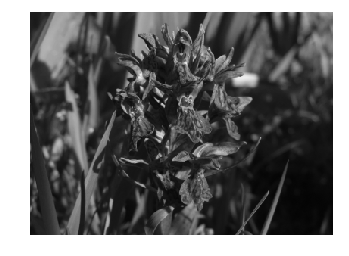

In [25]:
img = load_image_gray("imgs/orchid.png")
print(img.shape, img.dtype)
show_image(img)

### Sounds
A sound is just a 1D array (pressure values over time). We need lots of measurements per second to get good sound (e.g. 44100 measurements per second for "CD quality" audio).

In [26]:
## Audio example
snd = load_sound("guitar.wav")
print(snd.shape, snd.dtype)
print("Duration will be: %.2f seconds " % (snd.shape[0] / 44100.0))
play_sound(snd)

(223344L,) float64
Duration will be: 5.06 seconds 


c:\conda64\lib\site-packages\scipy\io\wavfile.py:221: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


## Plotting example

We can plot any 1D array using `plt.plot`, or a pair of 1D arrays (1 for x axis, 1 for y axis). This plots the whole array in one go.

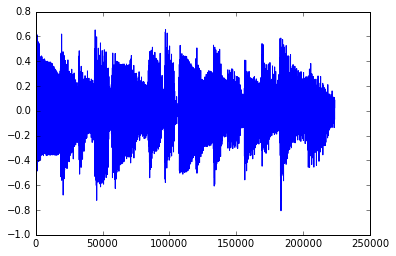

In [27]:
plt.plot(snd)

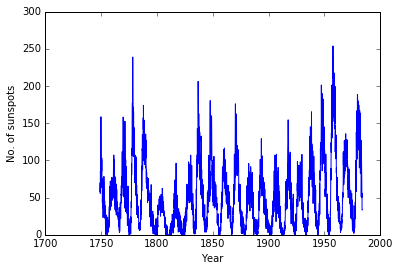

In [28]:
sunspots = np.loadtxt("sunspots.csv", delimiter=",")
plt.plot(sunspots[:,1], sunspots[:,2])
plt.xlabel("Year")
plt.ylabel("No. of sunspots")

## Indexing arrays
Arrays can be indexed like lists, but they can have **multidimensional** indices. These are indices which are really tuples of values:

In [29]:
# random values, shape = 8
x = np.random.uniform(0,1,size=(8,))
print(x)
# as with lists
print(x[0], x[1])

[ 0.70904664  0.15352464  0.10244845  0.34267684  0.84635192  0.60697142
  0.85923144  0.63863039]
0.709046635506 0.153524644284


In [21]:
# random values, shape = 8x12
x = np.random.uniform(0,1,size=(6,6))
print(x)
print(x[0,5]) # row 0 column 5
print(x[2,3]) # row 2 column 3
print(x[-1, -1]) # last row, last column

[[ 0.47800074  0.19689706  0.53790935  0.96466018  0.38914341  0.8148692 ]
 [ 0.39980455  0.71646061  0.4143997   0.0536096   0.66836923  0.47388643]
 [ 0.48358484  0.75156379  0.10782137  0.44898782  0.95650755  0.16270515]
 [ 0.32734374  0.02127736  0.01595398  0.66283346  0.22422563  0.64681167]
 [ 0.24316274  0.44103818  0.37225556  0.46721829  0.31482441  0.292688  ]
 [ 0.44195058  0.00303405  0.59570513  0.44283072  0.85203789  0.94778793]]
0.814869199395
0.448987818014
0.947787926987


In [31]:
print(x[0]) # the whole row 0
# this is an array, so it has a shape
print(x[0].shape)

[ 0.79947007  0.64712807  0.20362195  0.16263825  0.77038694  0.30580999]
(6L,)


### Slicing
We can slice just like in lists, but now we can do so in **multiple** dimensions. If part of a multi-dimensional slice is just a single index, then we end up with an array with one less dimension.

In [32]:
# x is 8x8 (don't worry about how this works yet)
x = np.arange(64).reshape(8,8)
print(x)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]


In [33]:
print(x[0:4, 0:4])

[[ 0  1  2  3]
 [ 8  9 10 11]
 [16 17 18 19]
 [24 25 26 27]]


In [34]:
# row 2-6, column 0
print(x[2:6, 0])

[16 24 32 40]


In [35]:
# column 0
# note: first element is a slice, second is just an index
print(x[:,0])

[ 0  8 16 24 32 40 48 56]


In [36]:
# row 0
print(x[0,:])

[0 1 2 3 4 5 6 7]


## Slice assignment
We can change the values in arrays by indexing or slicing, just like lists

In [42]:
x = np.zeros((3,3))
x


array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [43]:
x[1,1] = 1
print(x)

[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


In [44]:
x[0,:] = -1  # slice; set first row to -1
print(x)

[[-1. -1. -1.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


In [47]:
x[:, 0] = -1 # slice set first row to -1
print(x)

[[-1. -1. -1.]
 [-1.  1.  0.]
 [-1.  0.  0.]]


In [48]:
x[:, 1] = [1,2, 3]  # set second column to 1,2,3
print(x)

[[-1.  1. -1.]
 [-1.  2.  0.]
 [-1.  3.  0.]]


In [40]:
x[2, ::2] = [1,5]  # slice set every second col 
# in the third column to 1,5
print(x)

[[-1.  1.  1.]
 [ 0.  2.  0.]
 [ 1.  3.  5.]]


## Cropping images
If an image is just an array of brightnesses, we could crop an image using slices; and so we can:

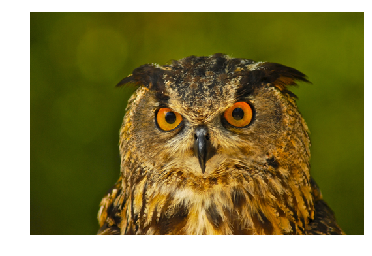

In [37]:
owl = load_image_colour("imgs/owl.png")
show_image(owl)

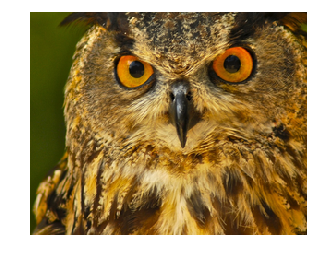

In [38]:
show_image(owl[100:400, 100:400, :])

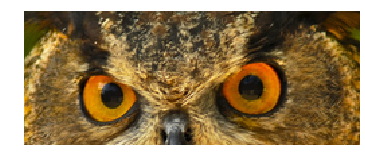

In [39]:
show_image(owl[100:200, 150:400, :])

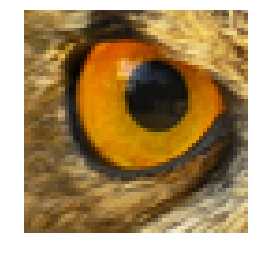

In [40]:
show_image(owl[140:200, 180:240, :])

## Joining arrays
We can also join arrays together, like + joined together lists. But now we have to decide on which **dimension** we are going to join. And we must adhere to the rule that the output has rectangular shape; we can't end up with a "ragged" array.

<img src="imgs/join.png" width="300px">

### concatenate and stack
We can use `concatenate` to join along an *existing* dimension; or `stack` to stack up arrays along a new dimension.


In [41]:
x = np.array([1,2,3,4])
y = np.array([5,6,7,8])
print("Stacked two 1D -> 2D")
print(np.stack([x,y]))
print("Concatenated two 1D -> 1D")
print(np.concatenate([x,y]))

Stacked two 1D -> 2D
[[1 2 3 4]
 [5 6 7 8]]
Concatenated two 1D -> 1D
[1 2 3 4 5 6 7 8]


In [42]:
# when we have multiple dimensions, we can specify explicitly
# which axis to join on
x = np.zeros((3,3))
y = np.ones((3,3))
print(np.concatenate([x,y],axis=0))
print()
print(np.concatenate([x,y],axis=1))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]

[[ 0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.]]


## Rearranging
Beyond splitting and joining arrays, we also need to be able to rearrange them in other ways.
### Reshaping
Arrays can be **reshaped** into a different shape *as long as the number of elements is unchanged.* 

In [48]:
y = np.arange(64)
print(y)
print()
# 8x8 array
print(y.reshape(8,8))
print()
# 4x16 array
print(y.reshape(4,16))
print()
# 4x4x4 array
print(y.reshape(4,4,4))
print()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63]

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]



In [49]:
# 64 -> 9x9
print(y.reshape(9,9)) # no -- needs too many elements

ValueError: total size of new array must be unchanged

In [50]:
# 64 -> 4x4
print(y.reshape(4,4)) # no -- new shape has too few elements

ValueError: total size of new array must be unchanged

In [51]:
# 64 -> 16 -> 4x4
print(y[:16].reshape(4,4)) # OK, we sliced to 16 elements, then reshaped

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


### Tiling
We can repeat an array multiple times: **tiling** it.

In [56]:
eye = np.array([[1,0], [0,1]])
print(eye, eye.shape)

[[1 0]
 [0 1]] (2L, 2L)


In [57]:
# tile 4x across columns     
np.tile(eye, (1, 4))

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

In [58]:
# tile 4x across rows
np.tile(eye, (4, 1))

array([[1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1]])

In [59]:
# tile 4x across stacks
np.tile(eye, (4, 1, 1))

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]])

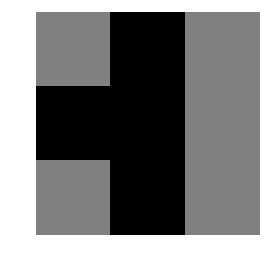

In [60]:
eye = np.array([[0.5,0,0.5], [0, 0, 0.5], [0.5, 0, 0.5]])
show_image(eye)

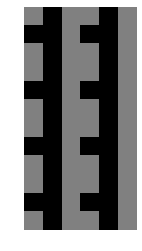

In [61]:
show_image(np.tile(eye, (4, 2)))

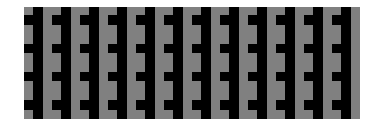

In [62]:
show_image(np.tile(eye, (4, 12)))

## Arithmetic on arrays
The major advantage of array representations is to be able to do **arithmetic** on arrays directly. For example, adding a value to every element of an array

In [69]:
x = np.ones((3,3))
print(x + 1)

[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


We can apply a function to every element of an array:

In [70]:
# cosine of x (a 2D array)
x = np.arange(50).reshape(5,10)
print(np.cos(x))

[[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219
   0.96017029  0.75390225 -0.14550003 -0.91113026]
 [-0.83907153  0.0044257   0.84385396  0.90744678  0.13673722 -0.75968791
  -0.95765948 -0.27516334  0.66031671  0.98870462]
 [ 0.40808206 -0.54772926 -0.99996083 -0.53283302  0.42417901  0.99120281
   0.64691932 -0.29213881 -0.96260587 -0.74805753]
 [ 0.15425145  0.91474236  0.83422336 -0.01327675 -0.84857027 -0.90369221
  -0.12796369  0.76541405  0.95507364  0.26664293]
 [-0.66693806 -0.98733928 -0.39998531  0.5551133   0.99984331  0.52532199
  -0.43217794 -0.99233547 -0.64014434  0.30059254]]


[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
  2.44948974  2.64575131  2.82842712  3.          3.16227766  3.31662479
  3.46410162  3.60555128  3.74165739  3.87298335  4.          4.12310563
  4.24264069  4.35889894  4.47213595  4.58257569  4.69041576  4.79583152
  4.89897949  5.          5.09901951  5.19615242  5.29150262  5.38516481
  5.47722558  5.56776436  5.65685425  5.74456265  5.83095189  5.91607978
  6.          6.08276253  6.164414    6.244998    6.32455532  6.40312424
  6.4807407   6.55743852  6.63324958  6.70820393  6.78232998  6.8556546
  6.92820323  7.          7.07106781  7.14142843  7.21110255  7.28010989
  7.34846923  7.41619849  7.48331477  7.54983444  7.61577311  7.68114575
  7.74596669  7.81024968  7.87400787  7.93725393]


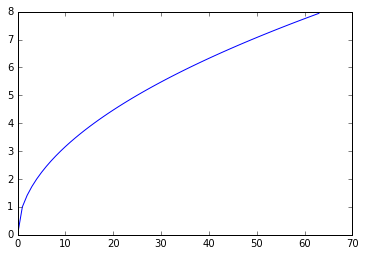

In [71]:
# function of 1D array
print(np.sqrt(np.arange(64)))
plt.plot(np.arange(64), np.sqrt(np.arange(64)))

In [72]:
# and combine operators.
print((x+2)**2)

[[   4    9   16   25   36   49   64   81  100  121]
 [ 144  169  196  225  256  289  324  361  400  441]
 [ 484  529  576  625  676  729  784  841  900  961]
 [1024 1089 1156 1225 1296 1369 1444 1521 1600 1681]
 [1764 1849 1936 2025 2116 2209 2304 2401 2500 2601]]


or we can add two arrays together:

In [73]:
y = np.eye(3)
print(y)
print()
x = np.ones((3,3))
print(x)
print()
print(x+y)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]

[[ 2.  1.  1.]
 [ 1.  2.  1.]
 [ 1.  1.  2.]]


or scaling each column of an array by a different value

In [74]:
column_scales = [2,3,0]
print((x+y) * np.array(column_scales))

[[ 4.  3.  0.]
 [ 2.  6.  0.]
 [ 2.  3.  0.]]


Note that we did **different** things each time: we added a scalar to a matrix; added a matrix to a matrix and multiplied a matrix by a vector.



## Changing volume
If a sound is just an array of values, then we can use scalar operations to apply changes to a whole sound at once.

For example, scaling (multiplying the values) will change the volume.

In [ ]:
guitar = load_sound("guitar.wav")
print(guitar.shape, guitar.dtype)

In [ ]:
play_sound(guitar)

In [ ]:
play_sound(guitar*0.2)

In [ ]:
play_sound(guitar*3)

In [ ]:
# trust me, this will distort the guitar without making it very loud
play_sound(np.tanh(guitar*300)*0.15)

If we wanted to fade in the sound, we'd need to multiply *each element* by a different value (e.g. fading from 0.0 to 1.0). This is easy with a function called `linspace` which generates $n$ values linearly spaced between two end points.

In [ ]:
fade = np.linspace(0,1,len(guitar))
play_sound(guitar*fade)
# this is the same as the linspace above, but uglier
# fade = np.arange(0,len(guitar)) / float(len(guitar))

## Mixing sounds
And we can even mix together sounds by adding them:
    

In [ ]:
sax = load_sound("sax.wav")
play_sound(sax)

In [ ]:
max_len = min(len(guitar), len(sax))
# nb: here I slice so that both are the length of the shortest sound
play_sound(sax[:max_len]+guitar[:max_len])

In [ ]:
play_sound(fade*sax[:max_len]+(1-fade)*guitar[:max_len])

In [ ]:
plt.plot(fade)
plt.plot(1-fade)

### Slicing and tiling sounds
we can stutter with tile and reshape:   

In [ ]:
# choose an even sized segment
snd_s = guitar[:48000*4]
# split into 4800 segment wide blocks
snd_s  = snd_s.reshape(-1,1200)
# tile each block 4 times, then read out the whole thing
# in one long thread
play_sound(np.tile(snd_s, (1,2)).ravel())

In [ ]:
# we can actually fix the clicking easily
import scipy.signal
n = scipy.signal.hann(1200) # some magic
play_sound(np.tile(snd_s*n, (1,2)).ravel())

## Slice assignment

Note that broadcasting works in assignments too.
So I can set one whole row to a value or a one whole column with a simple operation:

In [ ]:
x = np.zeros((8,8))
x[:,3] = 1 # row 3 set to 1
x[3,:] = 2 # row 4 set to 2
print(x)

This works even for more complex multidimensional slices and using the assign-and-modify operators:

In [ ]:
orchid = load_image_colour("imgs/orchid.png")
show_image(orchid)

In [ ]:
bar_orchid = np.array(orchid)
bar_orchid[100:180, 20:350, :] *= 0.25
show_image(bar_orchid)

In [ ]:
c_orchid = np.array(orchid)
c_orchid[100:180, 20:350, :] = c_orchid[180:100:-1, 20:350, :]
show_image(c_orchid)

## Simultaneous operations 
We can use the arithmetic functions to do things like compute the ratio of two columns of data

In [2]:
# the price of wheat 1565-1810 in format:
#      index, year, wheat price, weekly wage
wheat = np.loadtxt("wheat.csv", delimiter=",")
print(wheat)

[[    1.    1565.      41.       5.  ]
 [    2.    1570.      45.       5.05]
 [    3.    1575.      42.       5.08]
 [    4.    1580.      49.       5.12]
 [    5.    1585.      41.5      5.15]
 [    6.    1590.      47.       5.25]
 [    7.    1595.      64.       5.54]
 [    8.    1600.      27.       5.61]
 [    9.    1605.      33.       5.69]
 [   10.    1610.      32.       5.78]
 [   11.    1615.      33.       5.94]
 [   12.    1620.      35.       6.01]
 [   13.    1625.      33.       6.12]
 [   14.    1630.      45.       6.22]
 [   15.    1635.      33.       6.3 ]
 [   16.    1640.      39.       6.37]
 [   17.    1645.      53.       6.45]
 [   18.    1650.      42.       6.5 ]
 [   19.    1655.      40.5      6.6 ]
 [   20.    1660.      46.5      6.75]
 [   21.    1665.      32.       6.8 ]
 [   22.    1670.      37.       6.9 ]
 [   23.    1675.      43.       7.  ]
 [   24.    1680.      35.       7.3 ]
 [   25.    1685.      27.       7.6 ]
 [   26.    1690.      40

In [3]:
# do arithmetic
wheat_afforded =  wheat[:,3]/wheat[:,2]
print(wheat_afforded)

[ 0.12195122  0.11222222  0.12095238  0.1044898   0.12409639  0.11170213
  0.0865625   0.20777778  0.17242424  0.180625    0.18        0.17171429
  0.18545455  0.13822222  0.19090909  0.16333333  0.12169811  0.1547619
  0.16296296  0.14516129  0.2125      0.18648649  0.1627907   0.20857143
  0.28148148  0.2         0.17        0.3         0.3125      0.25
  0.35606061  0.43103448  0.33333333  0.51153846  0.425       0.51851852
  0.52727273  0.48387097  0.44225352  0.53225806  0.40930233  0.39361702
  0.44318182  0.45652174  0.54761905  0.53684211  0.36184211  0.36075949
  0.36419753  0.3030303 ]


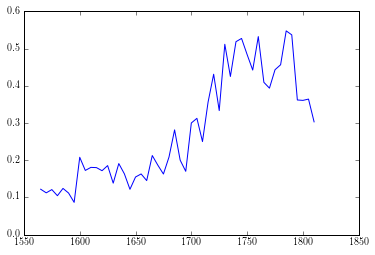

In [4]:
plt.plot(wheat[:,1], wheat_afforded)

## Conditions on arrays
We can do equality tests and comparisons on arrays, just like you would expect. Note that the results are **elementwise**.

In [5]:
# years greater than 1700
print(wheat[:,1]>1700)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


### Boolean array
The output is a Boolean array. Boolean arrays are extremely useful types.

### any and all
`np.any` and `np.all` test if an array of Boolean values is all True or not all False (i.e. if any element is True). This means we can test the equality of two arrays like this:

In [6]:
a = np.zeros((2,2))
b = np.zeros((2,2))
c = np.ones((2,2))
print(np.all(a==b))
print(np.all(a==c))

True
False


### Where
We can use a Boolean array to select elements of an array with `np.where(bool, a,b)` which selects `a` where `bool` is True  and `b` where `bool` is False.

In [26]:
x = np.arange(20).reshape(4,5)
print(x)
print()
# if x>10, replace with 4*x, otherwise replace with 0
# note the implicit broadcast here
print(np.where(x>10, 4*x, 0))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0 44 48 52 56]
 [60 64 68 72 76]]


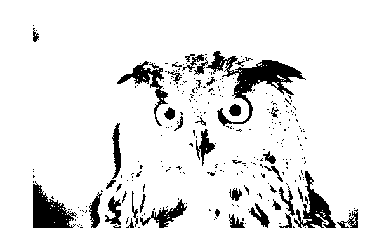

In [27]:
owl_gray = load_image_gray("imgs/owl.png")

# make the image either black (0) or white (1)
show_image(np.where(owl_gray<0.2, 0, 1))

### Fancy indexing
Importantly, we can use an **array** (or any sequence) as an index. This means to select every element given in the indexing array. It is a very powerful operator, because we select irregular parts of an array and perform operations on them.

In [28]:
x[:,[1,3,4]] = -1
print(x)

[[ 0 -1  2 -1 -1]
 [ 5 -1  7 -1 -1]
 [10 -1 12 -1 -1]
 [15 -1 17 -1 -1]]


### Boolean indexing
In fact, we can do this directly using a Boolean array as a slice. This **masks** or **selects** part of an array:

In [29]:
x = np.arange(20).reshape(4,5)
# subtract 10 from every element that was originally less than 4
x[x<4] = x[x<4] - 10
print(x)

[[-10  -9  -8  -7   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]
 [ 15  16  17  18  19]]


## Aggregate functions
Aggregate functions combine together many elements to produce an *aggregate* result.
#### Min, max
For example, finding the maximum or minimum of an array:

In [12]:
wheat_price = wheat[:,2]
print(np.min(wheat_price), np.max(wheat_price))

26.0 99.0


#### Mean, median, standard deviation
Standard statistical functions like the sum, mean, median and standard deviation are built in:

In [13]:
wheat_price = wheat[:,2]
print("mean", np.mean(wheat_price), "median", np.median(wheat_price))
print("std.", np.std(wheat_price))
print("sum", np.sum(wheat_price))

mean 42.14 median 40.25
std. 14.7299151389
sum 2107.0


##### Axis arguments
By default, aggregate functions operate over the whole array, regardless of how many dimensions it has. So the mean of `wheat` is the mean of every value in the array (including index, year, wheat price, wages)

In [14]:
print(np.mean(wheat))

441.6804


But we can also do this operation along specific dimensions or axes; for example, to get the mean per column:

In [15]:
# mean across rows; i.e. per column
print(np.mean(wheat, axis=0))

[   25.5     1687.5       42.14      11.5816]


In [16]:
# or the total sum across the columns
print(np.sum(wheat, axis=0))

[  1275.    84375.     2107.      579.08]


The same works for rows, but is less useful in this example. We can see it in an image example:
    

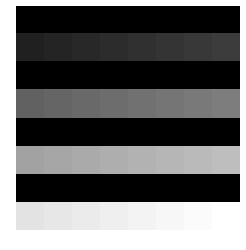

In [17]:
x = np.linspace(0,1,64).reshape(8,8)
x[::2,:] = 0
show_image(x)

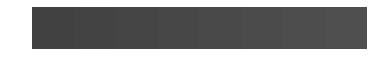

In [18]:
show_image(np.mean(x, axis=0).reshape(1,8))

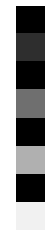

In [19]:
show_image(np.mean(x, axis=1).reshape(8,1))

## Finally
Feedback via YACRS please.

## Week review

* Arrays are efficient ways of representing and manipulating organised numerical data
* Arrays must be rectangular.
* Arrays are typed and have fixed dimensions. Every array element must have the **same** type.
* Arrays can have 1, 2, or more dimensions.
* Arrays can be created from sequences, or created as "blank" arrays
* Arrays can be joined together, split apart with slices, flipped, rotated and transposed.
* Arithmetic on arrays makes it easy to do operations on **all** of the elements at one time.
* Slice arithmetic allows portions of an array to be manipulated easily.
* We can apply conditions to arrays and get Boolean arrays back. These can be used to select irregular portions of arrays and do operations on them.
* Aggregate functions take arrays of values and return some group or summary value (like the sum or the mean). They can be applied per-axis.

## Syntax review
Read: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html for a detailed syntax review.